In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
## reading df from the CSV files
df1 = pd.read_csv("Train.csv")
df2 = pd.read_csv("Test.csv")
df3 = pd.read_csv("Valid.csv")
df = pd.concat([df1,df2,df3])

In [3]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [4]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
df.drop_duplicates(inplace=True)

([<matplotlib.patches.Wedge at 0x1e616d73560>,
 [Text(-0.006446895605061071, 1.0999811078091557, 'Positive'),
  Text(0.006446895605061181, -1.0999811078091557, 'Negative')],
 [Text(-0.003516488511851493, 0.5999896951686303, '50.2%'),
  Text(0.003516488511851553, -0.5999896951686303, '49.8%')])

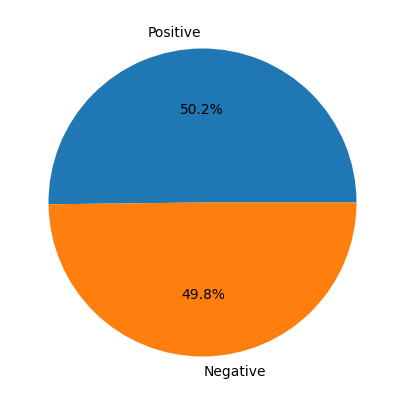

In [6]:

fig=plt.figure(figsize=(5,5))
pos=df[df['label']==1]
neg=df[df['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%')
                 

In [7]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
df['text']=df['text'].apply(preprocessor)

<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\SVI\AppData\Local\Temp\ipykernel_10336\1663826240.py:4: SyntaxWarning: invalid escape sequence '\)'
  emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
C:\Users\SVI\AppData\Local\Temp\ipykernel_10336\1663826240.py:5: SyntaxWarning: invalid escape sequence '\W'
  text=re.sub('[\W]+',' ',text.lower()) +\


In [8]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


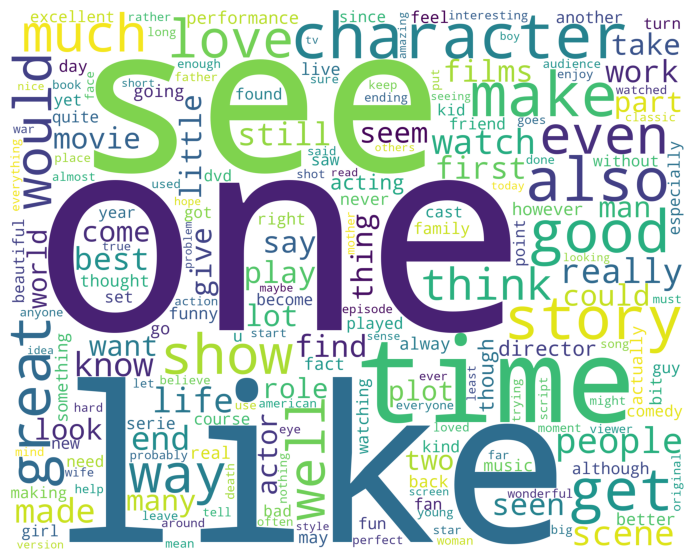

Negative words are as follows


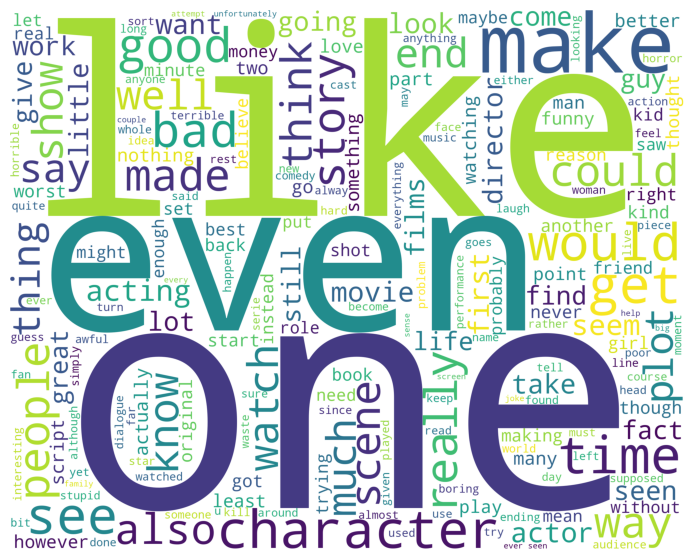

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedf = df[ df['label'] == 1]
positivedf =positivedf['text']
negdf = df[df['label'] == 0]
negdf= negdf['text']

def wordcloud_draw(df, color = 'white'):
    words = ' '.join(df)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedf,'white')
print("Negative words are as follows")
wordcloud_draw(negdf)

In [10]:
df.label.values

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=df.label.values
x=tfidf.fit_transform(df.text)

c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2,shuffle=False)

In [13]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8960371079963698

In [15]:
# import speech_recognition as sr

# def recognize_speech():
#     recognizer = sr.Recognizer()

#     with sr.Microphone() as source:
#         print("Say something:")
#         recognizer.adjust_for_ambient_noise(source)
#         audio = recognizer.listen(source)

#     try:
#         print("Recognizing...")
#         text = recognizer.recognize_google(audio)
#         print("You said:", text)
#         return text
#     except sr.UnknownValueError:
#         print("Could not understand audio.")
#         return None
#     except sr.RequestError as e:
#         print(f"Could not request results from Google Speech Recognition service; {e}")
#         return None

# # Call the function to recognize speech
# user_input = recognize_speech()

# if user_input:
#     # Now you can use the `user_input` in your application
#     print("User Input:", user_input)


Say something:
Recognizing...
Could not understand audio.


In [17]:
user_data = input()
user_df = tfidf.transform([user_data])
prediction = clf.predict(user_df)
if(prediction==0):
    print('bad review')
else:
    print("good review")


bad review


In [18]:
import pickle
pickle_out = open("clf.pkl",'wb')
pickle.dump(clf,pickle_out)
pickle_out.close()


In [19]:
pickle_transform = open("tra.pkl","wb")
pickle.dump(tfidf,pickle_transform)
pickle_transform.close()

In [20]:
pickle_pre = open("pre.pkl","wb")
pickle.dump(preprocessor,pickle_pre)
pickle_pre.close()
pickle_token = open("token.pkl","wb")
pickle.dump(tokenizer,pickle_token)
pickle_token.close()
pickle_tokenizer = open("tokenizer.pkl","wb")
pickle.dump(tfidf,pickle_tokenizer)
pickle_tokenizer.close()